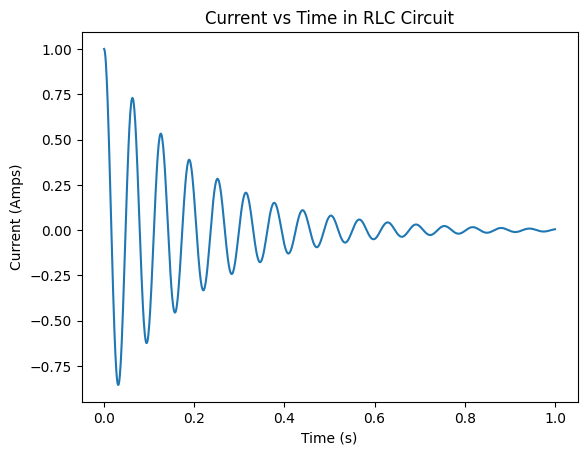

In [4]:
"""rlc_circuit.ipynb"""

# Cell 1 (referenced https://media.ed.ac.uk/media/Solving+Differential+Equations+in+PythonA+Higher+order+ODEs+with+solve_ivp/1_c8g7fwhw)

from __future__ import annotations
import typing
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

R: np.float_ = 0.1
L: np.float_ = 0.01
C: np.float_ = 0.01
init_I: np.float_ = 1
init_d_I: np.float_ = 0

def model(time: np.float_, state_vector: NDArray[np.float_]) -> NDArray[np.float_]:
    I: np.float_ = state_vector[0]
    d_I: np.float_ = state_vector[1]
    return [d_I, - R / L * d_I - I / (L * C)]

def plot(ax: Axes) -> None:
    t: NDArray[np.float_] = np.linspace(0, 1, 1000)
    res = solve_ivp(fun=model, t_span=[t[0], t[-1]], y0=[init_I, init_d_I], t_eval=t)
    
    ax.plot(res.t, res.y[0])

    ax.set_title("Current vs Time in RLC Circuit")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Current (Amps)")

plot(plt.axes())
